## WeatherPy

In [10]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from citipy import citipy
import seaborn
import random

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Generate Cities List

In [11]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
city_data = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lat, lng)

weather_df = pd.DataFrame({"Latitude": lat, "Longitude": lng})
weather_df.head()

,Latitude,Longitude
0,39.091643,-69.628970
1,-59.589941,134.520091
2,56.583129,-171.120241
3,-21.728888,29.799696
4,-41.599546,106.189702


In [13]:
#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in city_data:
        city_data.append(city)

#Print the city count to confirm sufficient count
len(city_data)

612

In [15]:
city_data

['new norfolk',
 'provideniya',
 'beitbridge',
 'busselton',
 'bam',
 'touros',
 'chagda',
 'umm lajj',
 'barrow',
 'borogontsy',
 'khandyga',
 'nuuk',
 'dikson',
 'ribeira grande',
 'kruisfontein',
 'mataura',
 'hilo',
 'west wendover',
 'hazorasp',
 'oranjestad',
 'rikitea',
 'cape town',
 'castro',
 'albany',
 'guerrero negro',
 'coahuayana',
 'tilichiki',
 'saint george',
 'harper',
 'umzimvubu',
 'souillac',
 'chokurdakh',
 'bredasdorp',
 'san patricio',
 'vaini',
 'vestmanna',
 'amderma',
 'tasiilaq',
 'bud',
 'lebu',
 'upernavik',
 'port elizabeth',
 'nikolskoye',
 'syamzha',
 'jamestown',
 'punta arenas',
 'mwinilunga',
 'illoqqortoormiut',
 'laiagam',
 'belyy yar',
 'flinders',
 'kapaa',
 'faya',
 'iqaluit',
 'agadez',
 'thompson',
 'quesnel',
 'ushuaia',
 'hobart',
 'hermanus',
 'bathsheba',
 'hithadhoo',
 'tiksi',
 'cabo san lucas',
 'yulara',
 'palabuhanratu',
 'talah',
 'palmer',
 'inhambane',
 'mattru',
 'port alfred',
 'saskylakh',
 'saint-philippe',
 'kavieng',
 'espera

# Perform API Calls

In [16]:
 # OpenWeatherMap API Key
api_key = "5e8beccd07c0d11ff6ded6e2aa57281c"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [ ]:
# Build query URL
query_url = url + "&q=" + city

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

# Create counters
record_count = 1
set_count = 1
units = "imperial"

# Loop through the list of cities and perform a request for data on each
# Loop through all the cities in our list

for i, city in enumerate(city_data):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

         # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

       
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    record_count += 1
    
    time.sleep(2)

Beginning Data Retrieval     
-----------------------------
The weather API responded with: {'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 56.16, 'pressure': 1030.74, 'humidity': 100, 'temp_min': 56.16, 'temp_max': 56.16, 'sea_level': 1031.84, 'grnd_level': 1030.74}, 'wind': {'speed': 5.5, 'deg': 241.001}, 'rain': {'3h': 0.1875}, 'clouds': {'all': 92}, 'dt': 1532627386, 'sys': {'message': 0.0027, 'country': 'AU', 'sunrise': 1532560487, 'sunset': 1532597747}, 'id': 2075265, 'name': 'Busselton', 'cod': 200}.
Processing Record 1 of Set 1 | new norfolk
Processing Record 3 of Set 1 | provideniya
Processing Record 5 of Set 1 | beitbridge
Processing Record 7 of Set 1 | busselton
Processing Record 9 of Set 1 | bam
Processing Record 11 of Set 1 | touros
Processing Record 13 of Set 1 | chagda
City not found. Skipping...
Processing Record 15 of Set 1 | umm lajj
Processing Record 1

Processing Record 42 of Set 4 | banepa
Processing Record 44 of Set 4 | dengzhou
Processing Record 46 of Set 4 | la union
Processing Record 48 of Set 4 | sfantu gheorghe
Processing Record 50 of Set 4 | sao filipe
Processing Record 52 of Set 4 | meyungs
City not found. Skipping...
Processing Record 54 of Set 4 | joao camara
Processing Record 56 of Set 4 | gazanjyk
Processing Record 58 of Set 4 | te anau
Processing Record 60 of Set 4 | norman wells
Processing Record 62 of Set 4 | marabba
Processing Record 64 of Set 4 | hamilton
Processing Record 66 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 68 of Set 4 | airai
Processing Record 70 of Set 4 | oktyabrskoye
Processing Record 72 of Set 4 | erenhot
Processing Record 74 of Set 4 | loukhi
Processing Record 76 of Set 4 | padang
Processing Record 78 of Set 4 | galveston
Processing Record 80 of Set 4 | the valley
Processing Record 82 of Set 4 | katsuura
Processing Record 84 of Set 4 | saint-leu
Processing Record 86 of Set 

Processing Record 20 of Set 8 | wakefield
Processing Record 22 of Set 8 | meulaboh
Processing Record 24 of Set 8 | krasnoyarsk-66
City not found. Skipping...
Processing Record 26 of Set 8 | half moon bay
Processing Record 28 of Set 8 | mitu
Processing Record 30 of Set 8 | dingli
Processing Record 32 of Set 8 | saint-pierre
Processing Record 34 of Set 8 | mnogovershinnyy
Processing Record 36 of Set 8 | phan rang
City not found. Skipping...
Processing Record 38 of Set 8 | gurgan
City not found. Skipping...
Processing Record 40 of Set 8 | blythe
Processing Record 42 of Set 8 | beboto
Processing Record 44 of Set 8 | malwan
City not found. Skipping...
Processing Record 46 of Set 8 | ust-kuyga
Processing Record 48 of Set 8 | tagusao
Processing Record 50 of Set 8 | nome
Processing Record 52 of Set 8 | nueva granada
Processing Record 54 of Set 8 | kochinda
Processing Record 56 of Set 8 | charters towers
Processing Record 58 of Set 8 | nioki
Processing Record 60 of Set 8 | los llanos de aridane

In [ ]:
city_data

In [ ]:
#for city in cities:
  
    #try:
     #   response = requests.get(query_url).json()
      
    #lat = response['coord']['lat']
        #lat.append(response['coord']['lat'])
        #temp = response['main']['temp']

        #print(f"The latitude is: {lat}")
        #print(f"The longitude is: {lat}")
        #print(f"The temperature (F) is: {temp}")
        
        #temp = response["main"]["temp_max"]
        #humid = response["main"]["humidity"]
        #cloudy = response["clouds"]["all"]
        #wind = response["wind"]["speed"]
        #date = response["dt"]
        #newlat = response["coord"]["lat"]
        #newlng = response["coord"]["lon"]
    
        #weather_df.set_value(index, "City", cityname)
        #weather_df.set_value(index, "Country", country_name)
        #weather_df.set_value(index, "Date", date)
        #weather_df.set_value(index, "Max Temperature (F)", pd.to_numeric(temp))
        #weather_df.set_value(index, "Humidity (%)", humid)
        #weather_df.set_value(index, "Cloudiness (%)", cloudy)
        #weather_df.set_value(index, "Wind Speed (mph)", wind)
        #probably unnecessary, but replacing previous coordinates with city coordinates for accuracy
        #weather_df.set_value(index, "Latitude", newlat)
        #weather_df.set_value(index, "Longitude", newlng)
    #except:
     #   print("Oops, skipping this one!")
    
    #counter += 1


In [1]:
weather_df["City"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Temperature (F)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Wind Speed (mph)"] = ""
weather_df.head()

NameError: name 'weather_df' is not defined

In [119]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
Latitude            1500 non-null float64
Longitude           1500 non-null float64
City                1500 non-null object
Country             1500 non-null object
Date                1500 non-null object
Temperature (F)     1500 non-null object
Humidity (%)        1500 non-null object
Cloudiness (%)      1500 non-null object
Wind Speed (mph)    1500 non-null object
dtypes: float64(2), object(7)
memory usage: 105.5+ KB


In [120]:
weather_df.drop_duplicates(subset=["City","Country"], inplace=True)
weather_df

,Latitude,Longitude,City,Country,Date,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,70.179612,65.513309,,,,,,,


In [108]:
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(weather_df["Latitude"]), pd.to_numeric(weather_df["Max Temperature (F)"]))
plt.title("Max Temperature (F) vs. City Latitude on July 20, 2018", fontsize=20)
plt.ylabel("Max Temperature (F)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-100, 150)
plt.xlim(-100, 100)
plt.savefig("TempvsLat.png")
plt.show()

KeyError: 'Max Temperature (F)'

<Figure size 720x504 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(weather_df["Latitude"]), pd.to_numeric(weather_df["Humidity (%)"]))
plt.title("Humidity (%) vs. City Latitude on July 20, 2018", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-20, 120)
plt.xlim(-100, 100)
plt.savefig("HumidvsLat.png")
plt.show()

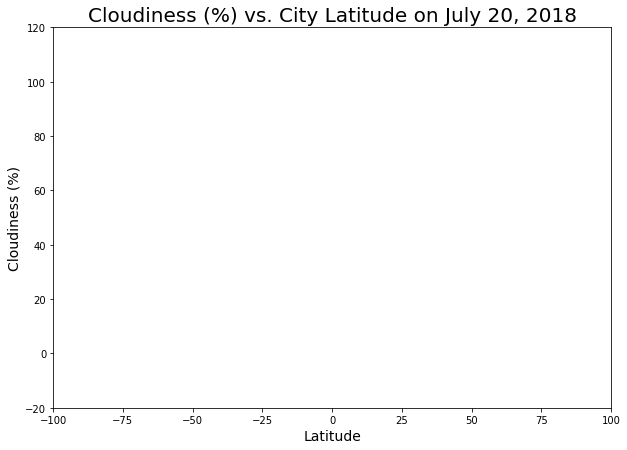

In [109]:
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(weather_df["Latitude"]), pd.to_numeric(weather_df["Cloudiness (%)"]))
plt.title("Cloudiness (%) vs. City Latitude on July 20, 2018", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-20, 120)
plt.xlim(-100, 100)
plt.savefig("CloudvsLat.png")
plt.show()

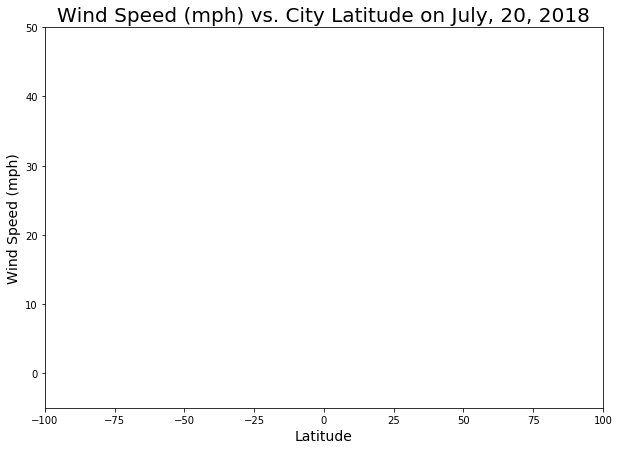

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(weather_df["Latitude"]), pd.to_numeric(weather_df["Wind Speed (mph)"]))
plt.title("Wind Speed (mph) vs. City Latitude on July, 20, 2018", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-5, 50)
plt.xlim(-100, 100)
plt.savefig("WindvsLat.png")
plt.show()

In [24]:
weather_df.to_csv("WeatherPy.csv")

In [17]:
plt.figure(figsize=(10,7))
temperatures = pd.to_numeric(weather_df["Max Temperature (F)"])
plt.scatter(pd.to_numeric(weather_df["Longitude"]), pd.to_numeric(weather_df["Latitude"]), c=temperatures, cmap='coolwarm')
plt.title("Longitude vs. Latitude Weather Map (for funsies)", fontsize=20)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.ylim(-90, 90)
plt.xlim(-180, 180)
plt.savefig("heatmap.png")
plt.show()

KeyError: 'Max Temperature (F)'

<Figure size 720x504 with 0 Axes>

Your objective is to build a series of scatter plots to showcase the following relationships:


Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude


Your final notebook must:


Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number and city name.
Save both a CSV of all data retrieved and png images for each scatter plot.


As final considerations:


You must complete your analysis using a Jupyter notebook.
You must use the Matplotlib or Pandas plotting libraries.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
See Example Solution for a reference on expected format.

# Observable trends

1.

2.

3.